In [2]:
from colors import _get_colors
import matplotlib.pyplot as plt
import numpy as np
import os
import re

# For each $\alpha$ plot the corresponding batches in `folder`

In [3]:
folder = 'phd'
files = sorted(os.listdir(folder))
all_batches = sorted([f for f in files if f.startswith('batch')], reverse=True)
all_ratios = []
for i, b in enumerate(all_batches):
    N = int(b[b.find('N-')+2 : b.find('K-')])
    K = int(b[b.find('K-')+2 : b.find('p-')])
    r = int(K/N*100)
    all_ratios.append(r)
unique_alphas = list(np.unique(all_ratios))
print('unique alphas', unique_alphas)

def sty(i):
    styles = ['^', 's', 'v', '1', '2', 'o', '*']
    return styles[i % len(styles)]

unique alphas [10, 34]


In [82]:
for ua in unique_alphas:
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(212)
    ic1 = 10 # center point of the inset x scale
    xyic1 = [.45, .2]
    inset1 = plt.axes(xyic1 + [.15, .25], facecolor='0.9')
    ic2 = 32 # center point of the inset x scale
    xyic2 = [.45, .475]
    inset2 = plt.axes(xyic2 + [.15, .25], facecolor='0.9')
    ax2.set_ylabel('$\psi$', fontsize=16)
    ax3.set_ylabel('$\chi$', fontsize=16)
    ax1.set_xlabel('a', fontsize=16)
    ax2.set_xlabel('a', fontsize=16)
    ax3.set_xlabel('a', fontsize=16)
    batches = [b for b,a in zip(all_batches, all_ratios) if a == ua]
    c = _get_colors(len(batches))
    for i, b in enumerate(batches):
        N = int(b[b.find('N-')+2 : b.find('K-')])
        data = np.loadtxt(folder + '/' + b, delimiter=',', skiprows=2)
        r = data[:,0]
        r2 = data[:,1]
        X = N*(r2 - r**2)
        psi = data[:,2]
        a = data[:,4]
        omega = data[:,3]*2*np.pi
        tmp = len([j for j in a if j < 1.6])
        omega[:tmp] = 0
        
        ax1.plot(a, r, '-'+sty(i), mfc='w', ms=8, color=c[i], zorder=-i, label='r')
        #ax1.plot(a[:tmp], omega[:tmp], '-'+sty(i), mfc='w', ms=8, color=c[i], zorder=-i)
        ax1.plot(a[tmp:], omega[tmp:], '-'+sty(i), mfc='w', ms=8, color=c[i], zorder=-i, label='$\omega$')
        ax2.plot(a, psi, '-'+sty(i), mfc='w', ms=8, color=c[i], zorder=-i)
        ax3.semilogy(a, X, '-'+sty(i), mfc='w', ms=8, color=c[i], label='N=%d'%N, zorder=-i)
        inset1.semilogy(a[ic1-4:ic1+4], X[ic1-4:ic1+4], '-'+sty(i), mfc='0.9', ms=8, color=c[i], label='N=%d'%N, zorder=-i)
        inset2.semilogy(a[ic2-4:ic2+4], X[ic2-4:ic2+4], '-'+sty(i), mfc='0.9', ms=8, color=c[i], label='N=%d'%N, zorder=-i)
    
        
    x, y = a[round(len(a) * 0.65)], omega[round(len(a) * 0.65)] - 0.2
    ax1.text(x, y, '$\omega$', fontsize=16)
    x, y = a[round(len(a) * 0.65)], r[round(len(a) * 0.65)] + 0.1
    ax1.text(x, y, 'r', fontsize=16)
    x, y = 1.03, 1.53
    ax3.text(x, y, '$\\alpha$=%.2f'%(ua/100), fontsize=16, transform=ax3.transAxes)

    arrow = dict(arrowstyle="->",
                 connectionstyle = "angle,angleA=0,angleB=90,rad=10")
    ax3.annotate('',
                 (a[ic1], X[ic1]/2), xytext=xyic1,
                 textcoords=fig.transFigure,
                 arrowprops=arrow)
    ax3.annotate('',
                 (a[ic2], X[ic2]*10), xytext=xyic2,
                 textcoords=fig.transFigure,
                 arrowprops=arrow)

    ax3.legend(fontsize=14, loc=(1.005, 0.8))
    #plt.show()
    plt.savefig("increasingN-alpha%d.png"%ua)

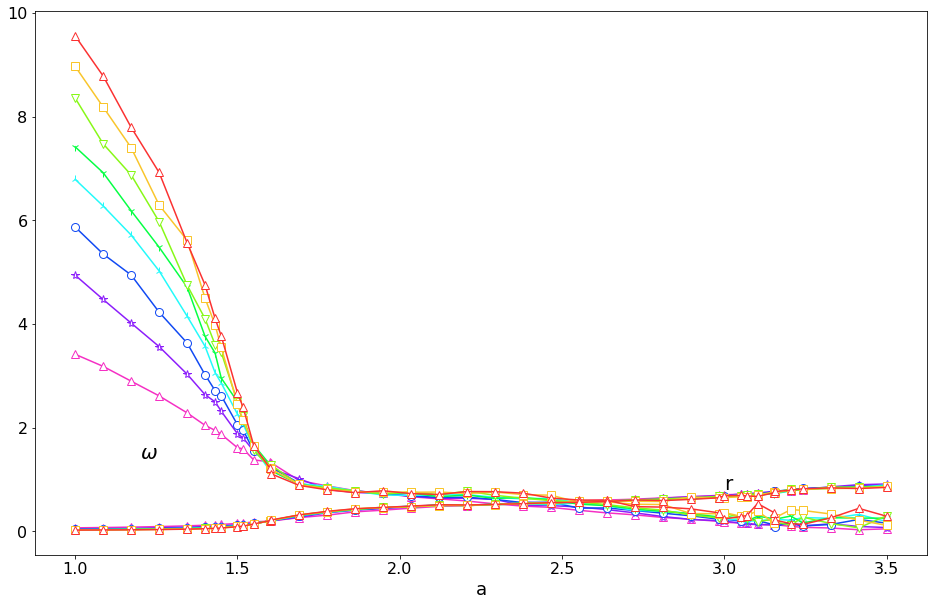

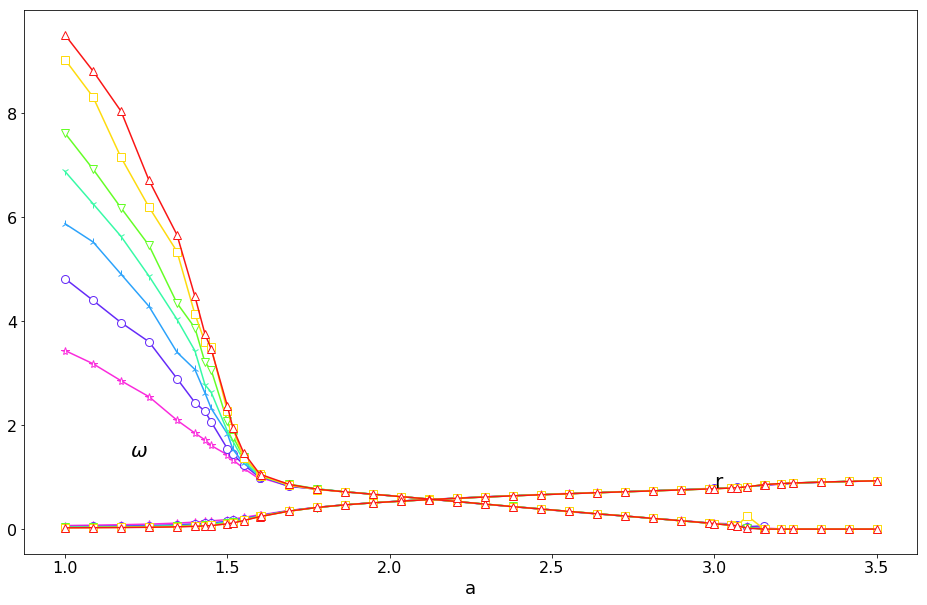

In [31]:
for ua in unique_alphas:
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(111)
    ax1.set_xlabel('a', fontsize=18)
    ax1.tick_params(labelsize=16)
    ax1.text(1.2, 1.4, '$\omega$', fontsize=20)
    ax1.text(3, 0.8, 'r', fontsize=20)
    #ax2 = fig.add_subplot(212)
    batches = [b for b,a in zip(all_batches, all_ratios) if a == ua]
    c = _get_colors(len(batches))
    for i, b in enumerate(batches):
        data = np.loadtxt(folder + '/' + b, delimiter=',', skiprows=2)
        r = data[:,0]
        r2 = data[:,1]
        X = N*(r2 - r**2)
        psi = data[:,2]
        a = data[:,4]
        omega = data[:,3]*2*np.pi
        omega_zoom = [o for o,a in zip(omega, a) if a > 3]
        a_zoom = [j for j in a if j > 3]
        if ua == 34: omega_zoom[2] = 0.005
        
        ax1.plot(a, omega, '-'+sty(i), mfc='w', ms=8, color=c[i], zorder=-i, label='$\omega$')
        ax1.plot(a, r, '-'+sty(i), mfc='w', ms=8, color=c[i], zorder=-i, label='$\omega$')
        #ax2.plot(a_zoom, omega_zoom, '-'+sty(i), mfc='w', ms=8, color=c[i], zorder=-i, label='$\omega$')
    plt.show()